In [2]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import model_selection,linear_model, metrics
import xgboost as xgb
import operator as op 


In [3]:
cr_data = pd.read_csv('data/credit_risk_dataset.csv')

In [4]:
emp_len_null = cr_data[cr_data['person_emp_length'].isnull()].index
int_rate_null = cr_data[cr_data['loan_int_rate'].isnull()].index

In [5]:
cr_data['person_emp_length'].fillna((cr_data['person_emp_length'].median()), inplace=True)
cr_data['loan_int_rate'].fillna((cr_data['loan_int_rate'].median()), inplace = True)

In [6]:
cr_data = cr_data.rename(columns = {"cb_person_default_on_file":"default_hist", "cb_person_cred_hist_length": "cr_hist_len"})

In [7]:
cr_clean1 = cr_data[cr_data['person_age']<=100]

In [8]:
num_col = cr_clean1.select_dtypes(exclude = 'object')
char_col = cr_clean1.select_dtypes(include = 'object')

In [9]:
encoded_char_col = pd.get_dummies(char_col)

In [10]:
cr_clean2 = pd.concat([num_col, encoded_char_col], axis=1)
cr_clean2

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cr_hist_len,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,default_hist_N,default_hist_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,0,0,...,0,0,0,0,1,0,0,0,0,1
1,21,9600,5.0,1000,11.14,0,0.10,2,0,0,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,0.57,3,1,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30,1,0,...,0,0,0,1,0,0,0,0,1,0
32577,54,120000,4.0,17625,7.49,0,0.15,19,1,0,...,0,1,0,0,0,0,0,0,1,0
32578,65,76000,3.0,35000,10.99,1,0.46,28,0,0,...,0,0,1,0,0,0,0,0,1,0
32579,56,150000,5.0,15000,11.48,0,0.10,26,1,0,...,0,0,1,0,0,0,0,0,1,0


In [11]:
Y = cr_clean2['loan_status']
X = cr_clean2.drop('loan_status',axis=1)

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, random_state=2020, test_size=.30)


xgb_model = xgb.XGBClassifier() 

xgb_model.fit(x_train, np.ravel(y_train)) 

predict_xgb = xgb_model.predict_proba(x_test) 

predict_xgb_prob = pd.DataFrame(predict_xgb[:,1],columns = ['Default Probability'])

pd.concat([predict_xgb_prob, y_test.reset_index(drop=True)],axis=1)

,Default Probability,loan_status
0,0.033276,0
1,0.000701,0
2,0.011722,0
3,0.002813,0
4,0.107398,0
...,...,...
9768,0.045192,0
9769,0.015024,0
9770,0.999846,1
9771,0.044685,0


In [12]:
X

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cr_hist_len,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,default_hist_N,default_hist_Y
0,22,59000,123.0,35000,16.02,0.59,3,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,21,9600,5.0,1000,11.14,0.10,2,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,0.57,3,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,0.53,2,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,0.55,4,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0.11,30,1,0,0,...,0,0,0,1,0,0,0,0,1,0
32577,54,120000,4.0,17625,7.49,0.15,19,1,0,0,...,0,1,0,0,0,0,0,0,1,0
32578,65,76000,3.0,35000,10.99,0.46,28,0,0,0,...,0,0,1,0,0,0,0,0,1,0
32579,56,150000,5.0,15000,11.48,0.10,26,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [13]:
print("There are {} features in cr_clean2".format(cr_clean2.shape[1]))
round(xgb_model.score(x_test,y_test),3)

There are 27 features in cr_clean2


0.932

In [14]:
# display feature and their importance
feat_imp = xgb_model.get_booster().get_score(importance_type='weight')

feat_imp

{'person_age': 343.0,
 'person_income': 724.0,
 'person_emp_length': 339.0,
 'loan_amnt': 334.0,
 'loan_int_rate': 501.0,
 'loan_percent_income': 313.0,
 'cr_hist_len': 205.0,
 'person_home_ownership_MORTGAGE': 48.0,
 'person_home_ownership_OTHER': 4.0,
 'person_home_ownership_OWN': 44.0,
 'person_home_ownership_RENT': 65.0,
 'loan_intent_DEBTCONSOLIDATION': 72.0,
 'loan_intent_EDUCATION': 56.0,
 'loan_intent_HOMEIMPROVEMENT': 47.0,
 'loan_intent_MEDICAL': 71.0,
 'loan_intent_PERSONAL': 41.0,
 'loan_intent_VENTURE': 34.0,
 'loan_grade_A': 24.0,
 'loan_grade_B': 35.0,
 'loan_grade_C': 47.0,
 'loan_grade_D': 54.0,
 'loan_grade_E': 34.0,
 'loan_grade_F': 18.0,
 'loan_grade_G': 16.0,
 'default_hist_N': 28.0}

In [15]:
#  most import features
sorted(feat_imp.items(), key=lambda kv: kv[1],reverse=True)[0:5]

[('person_income', 724.0),
 ('loan_int_rate', 501.0),
 ('person_age', 343.0),
 ('person_emp_length', 339.0),
 ('loan_amnt', 334.0)]

In [16]:
sorted_feat_imp = dict(sorted(feat_imp.items(), key=op.itemgetter(1),reverse=True))
sorted_feat_imp

{'person_income': 724.0,
 'loan_int_rate': 501.0,
 'person_age': 343.0,
 'person_emp_length': 339.0,
 'loan_amnt': 334.0,
 'loan_percent_income': 313.0,
 'cr_hist_len': 205.0,
 'loan_intent_DEBTCONSOLIDATION': 72.0,
 'loan_intent_MEDICAL': 71.0,
 'person_home_ownership_RENT': 65.0,
 'loan_intent_EDUCATION': 56.0,
 'loan_grade_D': 54.0,
 'person_home_ownership_MORTGAGE': 48.0,
 'loan_intent_HOMEIMPROVEMENT': 47.0,
 'loan_grade_C': 47.0,
 'person_home_ownership_OWN': 44.0,
 'loan_intent_PERSONAL': 41.0,
 'loan_grade_B': 35.0,
 'loan_intent_VENTURE': 34.0,
 'loan_grade_E': 34.0,
 'default_hist_N': 28.0,
 'loan_grade_A': 24.0,
 'loan_grade_F': 18.0,
 'loan_grade_G': 16.0,
 'person_home_ownership_OTHER': 4.0}

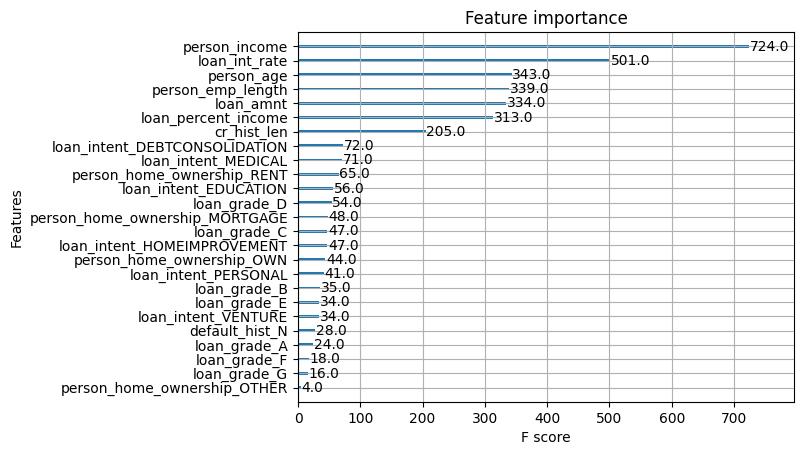

In [17]:
xgb.plot_importance(xgb_model,importance_type='weight');


In [18]:
remove_feats = []

for key in feat_imp.keys():
    if feat_imp[key] < 40:    # tried 
        remove_feats.append(key)
        
imp_data = X
for key in remove_feats:
    imp_data = imp_data.drop(key,axis=1)

In [19]:
imp_data.shape

(32576, 18)

In [20]:
display_most_imp_feat ={}
for key in list(imp_data.columns):
    if key  in feat_imp.keys():
        display_most_imp_feat[key] = feat_imp[key]

sorted(display_most_imp_feat.items(), key=lambda kv: kv[1],reverse=True)

[('person_income', 724.0),
 ('loan_int_rate', 501.0),
 ('person_age', 343.0),
 ('person_emp_length', 339.0),
 ('loan_amnt', 334.0),
 ('loan_percent_income', 313.0),
 ('cr_hist_len', 205.0),
 ('loan_intent_DEBTCONSOLIDATION', 72.0),
 ('loan_intent_MEDICAL', 71.0),
 ('person_home_ownership_RENT', 65.0),
 ('loan_intent_EDUCATION', 56.0),
 ('loan_grade_D', 54.0),
 ('person_home_ownership_MORTGAGE', 48.0),
 ('loan_intent_HOMEIMPROVEMENT', 47.0),
 ('loan_grade_C', 47.0),
 ('person_home_ownership_OWN', 44.0),
 ('loan_intent_PERSONAL', 41.0)]

In [21]:
round(xgb_model.score(x_test,y_test),3)

0.932

In [22]:
thresh = np.linspace(0,1,21)
thresh

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [23]:
def find_opt_thresh(predict,thr =thresh, y_true = y_test):
    data = predict
    
    def_recalls = []
    nondef_recalls = []
    accs =[]

    
    for threshold in thr:
        # predicted values for each threshold
        data['loan_status'] = data['Default Probability'].apply(lambda x: 1 if x > threshold else 0 )
        
        accs.append(metrics.accuracy_score(y_true, data['loan_status']))
        
        stats = metrics.precision_recall_fscore_support(y_true, data['loan_status'])
        
        def_recalls.append(stats[1][1])
        nondef_recalls.append(stats[1][0])
        
        
    return accs, def_recalls, nondef_recalls

accs, def_recalls, nondef_recalls= find_opt_thresh(predict_xgb_prob)

C:\Java\Python3.10.8\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Java\Python3.10.8\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


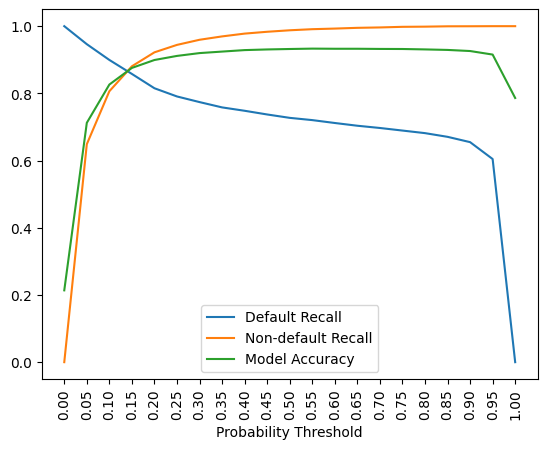

In [24]:
plt.plot(thresh,def_recalls)
plt.plot(thresh,nondef_recalls)
plt.plot(thresh,accs)
plt.xlabel("Probability Threshold")
plt.xticks(thresh, rotation = 'vertical')
plt.legend(["Default Recall","Non-default Recall","Model Accuracy"])
plt.show()